In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
print(f"Dimension of X : {X.shape}")
print(f"Dimension of y : {y.shape}")

Dimension of X : (100, 2)
Dimension of y : (100,)


In [3]:
y = y.reshape(y.shape[0], 1)
print(f"Dimension of y : {y.shape}")

Dimension of y : (100, 1)


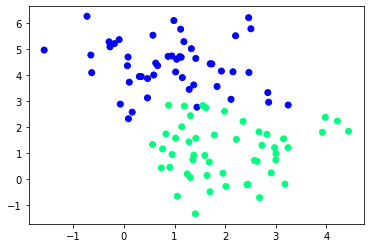

In [4]:
plt.scatter(X[:,0], X[:,1], c=y, cmap="winter")
plt.show()

In [5]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [6]:
W, b = initialisation(X)
print(f"Dimension of W : {W.shape}")
print(f"Dimension of b : {b.shape}")

Dimension of W : (2, 1)
Dimension of b : (1,)


In [7]:
W

array([[-0.70405519],
       [-2.19538941]])

In [8]:
b

array([0.83672241])

In [9]:
def sigmoid(A):
    return 1/(1 + np.exp(-A))

In [10]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

In [11]:
A = model(X, W, b)
print(f"Dimension of A : {A.shape}")

Dimension of A : (100, 1)


In [12]:
def log_loss(A, y):
    m = len(y)
    return -(1/m)*np.sum(y*np.log(A) + (1-y)*np.log(1-A))

In [13]:
log_loss(A, y)

1.629685847771585

In [14]:
def gradients(A, X, y):
    m = len(y)
    dW = (1/m)*np.dot(X.T, A-y)
    db = (1/m)*np.sum(A-y)
    return (dW, db)

In [15]:
dW, db = gradients(A, X, y)
print(f"Dimension of dW : {dW.shape}")
print(f"Dimension of db : {db.shape}")

Dimension of dW : (2, 1)
Dimension of db : ()


In [16]:
db

-0.41871012272454494

In [17]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [18]:
W1, b1 = update(dW, db, W, b, 0.1)
print(f"Dimension of W : {W1.shape}")
print(f"Dimension of b : {b1.shape}")

Dimension of W : (2, 1)
Dimension of b : (1,)


In [19]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
def artificial_neuron(X, y, learning_rate=0.1, n_iter=100):
    history = []
    W, b = initialisation(X)
    
    for i in range(n_iter):
        A = model(X, W, b)
        cost = log_loss(A, y)
        history.append(cost)
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        
    y_pred = predict(X, W, b)
    print(f"Accuracy score : {accuracy_score(y, y_pred)}")
    return (W, b, history)

In [22]:
(W, b, history) = artificial_neuron(X, y)
print(f"Dimension of W : {W.shape}")
print(W)
print(f"Dimension of b : {b.shape}")
print(b)

Accuracy score : 0.93
Dimension of W : (2, 1)
[[ 0.78221028]
 [-1.13541428]]
Dimension of b : (1,)
[1.54716276]


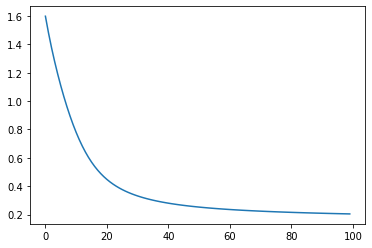

In [23]:
plt.plot(history)
plt.show()

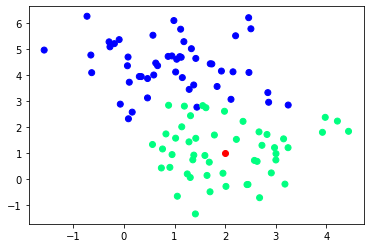

In [24]:
new_plant = np.array([2, 1])
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, cmap="winter")
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.show()

In [25]:
predict(new_plant, W, b)

array([ True])

In [26]:
x0 = np.linspace(-1, 5, 100)
x1 = -((W[0] * x0) + b) / W[1]

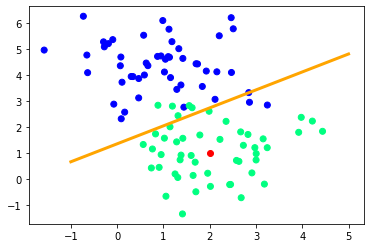

In [27]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, cmap="winter")
plt.plot(x0, x1, c='orange', lw=3)
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.show()